# 2.4: Evaluating Hyperparameters
## Part 1: Random Forest

### 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [2]:
# Set option to ensure charts are displayed inline in the notebook

%matplotlib inline

In [3]:
# Set option to display max number of columns

pd.set_option('display.max_columns', None)

In [2]:
path = r'C:\Users\rajkaran\Documents\CareerFoundry- Data Analytics Program\3. Specialization\Achievements 1- Tasks\1. Data'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, 'Data Sets','prepared_climate.csv'), index_col = False)
df

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0      19600101      1                  7            0.85          1.0180   
1      19600102      1                  6            0.84          1.0180   
2      19600103      1                  8            0.90          1.0180   
3      19600104      1                  3            0.92          1.0180   
4      19600105      1                  6            0.95          1.0180   
...         ...    ...                ...             ...             ...   
22945  20221027     10                  1            0.79          1.0248   
22946  20221028     10                  6            0.77          1.0244   
22947  20221029     10                  4            0.76          1.0227   
22948  20221030     10                  5            0.80          1.0212   
22949  20221031     10                  5            0.84          1.0193   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                        0.32                 0.09             0.7   
1                        0.36                 1.05             1.1   
2                        0.18                 0.30             0.0   
3                        0.58                 0.00             4.1   
4                        0.65                 0.14             5.4   
...                       ...                  ...             ...   
22945                    1.34                 0.22             7.7   
22946                    1.34                 0.22             5.4   
22947                    1.34                 0.22             6.1   
22948                    1.34                 0.22             5.8   
22949                    1.34                 0.22             3.2   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
0                  6.5             0.8            10.9                     1   
1                  6.1             3.3            10.1                     6   
2                  8.5             5.1             9.9                     6   
3                  6.3             3.8            10.6                     8   
4                  3.0            -0.7             6.0                     8   
...                ...             ...             ...                   ...   
22945             15.9            11.4            21.4                     2   
22946             16.7            14.3            21.9                     0   
22947             16.7            13.1            22.4                     2   
22948             15.4            11.6            21.1                     1   
22949             13.5             9.9            19.2                     4   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
0                   0.81             1.0195                       0.88   
1                   0.84             1.0172                       0.25   
2                   0.77             1.0179                       0.67   
3                   0.93             1.0268                       0.25   
4                   0.99             1.0286                       0.25   
...                  ...                ...                        ...   
22945               0.68             1.0278                       1.57   
22946               0.68             1.0295                       1.57   
22947               0.68             1.0278                       1.57   
22948               0.68             1.0238                       1.57   
22949               0.68             1.0235                       1.57   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
0                        0.00                7.0                 3.7   
1                        0.00                0.0                 2.9   
2                        0.00                3.5                 3.1   
3                        0.00                0.0                 2.0   
4                        0.06      

In [6]:
#Import pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data Sets','Pleasant_Weather.csv'))
pleasantweather

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0      19600101                       0                          0   
1      19600102                       0                          0   
2      19600103                       0                          0   
3      19600104                       0                          0   
4      19600105                       0                          0   
...         ...                     ...                        ...   
22945  20221027                       0                          0   
22946  20221028                       0                          0   
22947  20221029                       0                          0   
22948  20221030                       0                          0   
22949  20221031                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                              0                        0   
1                              0                        0   
2                              0                        0   
3                              0                        0   
4                              0                        0   
...                          ...                      ...   
22945                          0                        0   
22946                          0                        0   
22947                          0                        0   
22948                          0                        0   
22949                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                                0                          0   
1                                0                          0   
2                                0                          0   
3                                0                          0   
4                                0                          0   
...                            ...                        ...   
22945                            0                          0   
22946                            0                          0   
22947                            0                          0   
22948                            0                          0   
22949                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
...                        ...                         ...   
22945                        0                           0   
22946                        0                           0   
22947                        0                           0   
22948                        0                           0   
22949                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                                0                        0   
1                                0                        0   
2                                0                        0   
3                                0                        0   
4                                0                        0   
...                            ...                      ...   
22945                            0                        0   
22946                            0                        0   
22947                            0                        0   
22948                            0                        0   
22949                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                              0                      0   
1                              0    

### 2. Data Wrangling

In [7]:
# Reduce observations dataset to 2010's

dfdecade = df[df['DATE'].astype(str).str.startswith('201')] 
dfdecade

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
18263  20100101      1                  8            0.93          0.9965   
18264  20100102      1                  3            0.74          1.0193   
18265  20100103      1                  3            0.75          1.0226   
18266  20100104      1                  5            0.83          1.0169   
18267  20100105      1                  7            0.78          1.0073   
...         ...    ...                ...             ...             ...   
21910  20191227     12                  8            0.92          1.0273   
21911  20191228     12                  7            0.86          1.0380   
21912  20191229     12                  6            0.93          1.0387   
21913  20191230     12                  1            0.81          1.0354   
21914  20191231     12                  5            0.87          1.0350   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
18263                    0.18                 0.56             0.0   
18264                    0.58                 0.00             5.2   
18265                    0.61                 0.00             6.3   
18266                    0.48                 0.00             3.7   
18267                    0.53                 0.04             4.4   
...                       ...                  ...             ...   
21910                    0.15                 0.52             0.1   
21911                    0.35                 0.00             1.3   
21912                    0.61                 0.00             4.9   
21913                    0.64                 0.00             6.5   
21914                    0.58                 0.00             3.5   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
18263              2.9            -0.2             4.8                     6   
18264             -1.5            -4.2             0.4                     8   
18265             -3.2            -6.0             1.1                     7   
18266             -4.9            -8.3            -3.1                     2   
18267             -4.0            -7.1            -1.5                     6   
...                ...             ...             ...                   ...   
21910              6.8             5.6             7.9                     5   
21911              3.7            -0.6             5.7                     8   
21912             -0.8            -2.7             2.6                     8   
21913              0.5            -3.0             5.1                     6   
21914              0.4            -1.3             3.5                     2   

       BELGRADE_humidity  BELGRADE_pressure  BELGRADE_global_radiation  \
18263               0.85             0.9912                       0.64   
18264               0.92             0.9995                       0.25   
18265               0.82             1.0156                       0.25   
18266               0.72             1.0211                       0.86   
18267               0.81             1.0111                       0.39   
...                  ...                ...                        ...   
21910               0.68             1.0231                       0.20   
21911               0.68             1.0269                       0.21   
21912               0.68             1.0327                       0.21   
21913               0.68             1.0381                       0.21   
21914               0.68             1.0324                       0.48   

       BELGRADE_precipitation  BELGRADE_sunshine  BELGRADE_temp_mean  \
18263                    2.63                3.2                 9.9   
18264                    0.74                0.0                 3.5   
18265                    0.12                0.0                -0.6   
18266                    0.00                6.4                 0.0   
18267                    1.20      

In [8]:
# Reduce pleasant weather dataset to 2010's
pleasant_decade = pleasantweather[pleasantweather['DATE'].astype(str).str.startswith('201')]
pleasant_decade

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
18263  20100101                       0                          0   
18264  20100102                       0                          0   
18265  20100103                       0                          0   
18266  20100104                       0                          0   
18267  20100105                       0                          0   
...         ...                     ...                        ...   
21910  20191227                       0                          0   
21911  20191228                       0                          0   
21912  20191229                       0                          0   
21913  20191230                       0                          0   
21914  20191231                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
18263                          0                        0   
18264                          0                        0   
18265                          0                        0   
18266                          0                        0   
18267                          0                        0   
...                          ...                      ...   
21910                          0                        0   
21911                          0                        0   
21912                          0                        0   
21913                          0                        0   
21914                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
18263                            0                          0   
18264                            0                          0   
18265                            0                          0   
18266                            0                          0   
18267                            0                          0   
...                            ...                        ...   
21910                            0                          0   
21911                            0                          0   
21912                            0                          0   
21913                            0                          0   
21914                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
18263                        0                           0   
18264                        0                           0   
18265                        0                           0   
18266                        0                           0   
18267                        0                           0   
...                        ...                         ...   
21910                        0                           0   
21911                        0                           0   
21912                        0                           0   
21913                        0                           0   
21914                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
18263                            0                        0   
18264                            0                        0   
18265                            0                        0   
18266                            0                        0   
18267                            0                        0   
...                            ...                      ...   
21910                            0                        0   
21911                            0                        0   
21912                            0                        0   
21913                            0                        0   
21914                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
18263                          0                      0   
18264                          0    

In [9]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [10]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [11]:
# Create a dictionary to store the frequency of entries for each station
station_frequencies = {}

for station in unique_stations:
    # Select columns that belong to the current station
    station_columns = [col for col in  dfdecade.columns if col.startswith(station)]
    
    # Count non-missing entries across all columns for the station
    station_frequencies[station] =  dfdecade[station_columns].notna().sum().sum()

# Print the frequency of entries for each station
print("Frequency of entries for each weather station:")
for station, freq in station_frequencies.items():
    print(f"{station}: {freq} entries")

Frequency of entries for each weather station:
KASSEL: 32868 entries
DEBILT: 32868 entries
MAASTRICHT: 32868 entries
MUNCHENB: 32868 entries
MADRID: 32868 entries
DUSSELDORF: 32868 entries
OSLO: 32868 entries
SONNBLICK: 32868 entries
STOCKHOLM: 32868 entries
BELGRADE: 32868 entries
HEATHROW: 32868 entries
BUDAPEST: 32868 entries
VALENTIA: 32868 entries
LJUBLJANA: 32868 entries
BASEL: 32868 entries


In [12]:
# Drop unnecessary columns

dfdecade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [13]:
dfdecade.shape 

(3652, 135)

In [14]:
pleasant_decade.drop(columns = 'DATE', inplace = True)

In [15]:
pleasant_decade.shape

(3652, 15)

### 3. Reshaping for Modeling

In [16]:
X = dfdecade

In [17]:
y = pleasant_decade

In [18]:
# Turn X and y from a df to arrays

X = np.array(X)
y = np.array(y)

In [19]:
X.shape

(3652, 135)

In [20]:
y.shape

(3652, 15)

### 4. Data Split 

In [21]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [22]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(913, 135) (913, 15)


### 5. Hyperparameter Optimization

### Grid Search

In [23]:
# Create a RF classifier

clf = RandomForestClassifier()

In [24]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[15, 50, 100, 135], 
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [25]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.449 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.404 total time=   0.1s
[CV 3/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=10;, score=0.421 total time=   0.1s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.426 total time=   0.6s
[CV 1/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=15, min_samples_leaf=2, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 3/3] 

In [26]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776926
[CV 2/3] END max_depth=10, max_features=50, min_samples_leaf=3, min_samples_split=2, n_estimators=10;, score=0.570 total time=   0.5s
[CV 2/3] END max_depth=10, max_features=50, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=0.623 total time=   4.5s
[CV 1/3] END max_depth=10, max_features=50, min_samples_leaf=3, min_samples_split=3, n_estimators=10;, score=0.600 total time=   0.5s
[CV 1/3] END max_depth=10, max_features=50, min_samples_leaf=3, min_samples_split=3, n_estimators=100;, score=0.633 total time=   4.7s
[CV 1/3] END max_depth=10, max_features=100, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 2/3] END max_depth=10, max_features=100, min_samples_leaf=1, min_samples_split=1, n_estimators=10;, score=nan total time=   0.0s
[CV 

### Random Search

In [27]:
# Define random search cv

rs_space = {
    'max_depth': list(np.arange(10, 100, step=10)) + [None],
    'n_estimators': np.arange(150, 250, step=25),  # Focusing on around the best n_estimators
    'max_features': randint(30, 70),  # Adjusting to a narrower range based on grid search
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': randint(1, 4), 
    'min_samples_split': np.arange(2, 10, step=2) 
}

In [28]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [29]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=10, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Search took 1.2202812353769938 minutes


In [30]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.6443957648776926
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 40, 'max_features': 56, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best RANDOM search score is: 0.6418400876232201


### 6. Running Random Forest with Optimized Search Parameters

In [31]:
# Create a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 150, max_depth=None, max_features=56, min_samples_leaf=1, min_samples_split=2)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_features=56, n_estimators=150)

In [32]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.6615553121577218


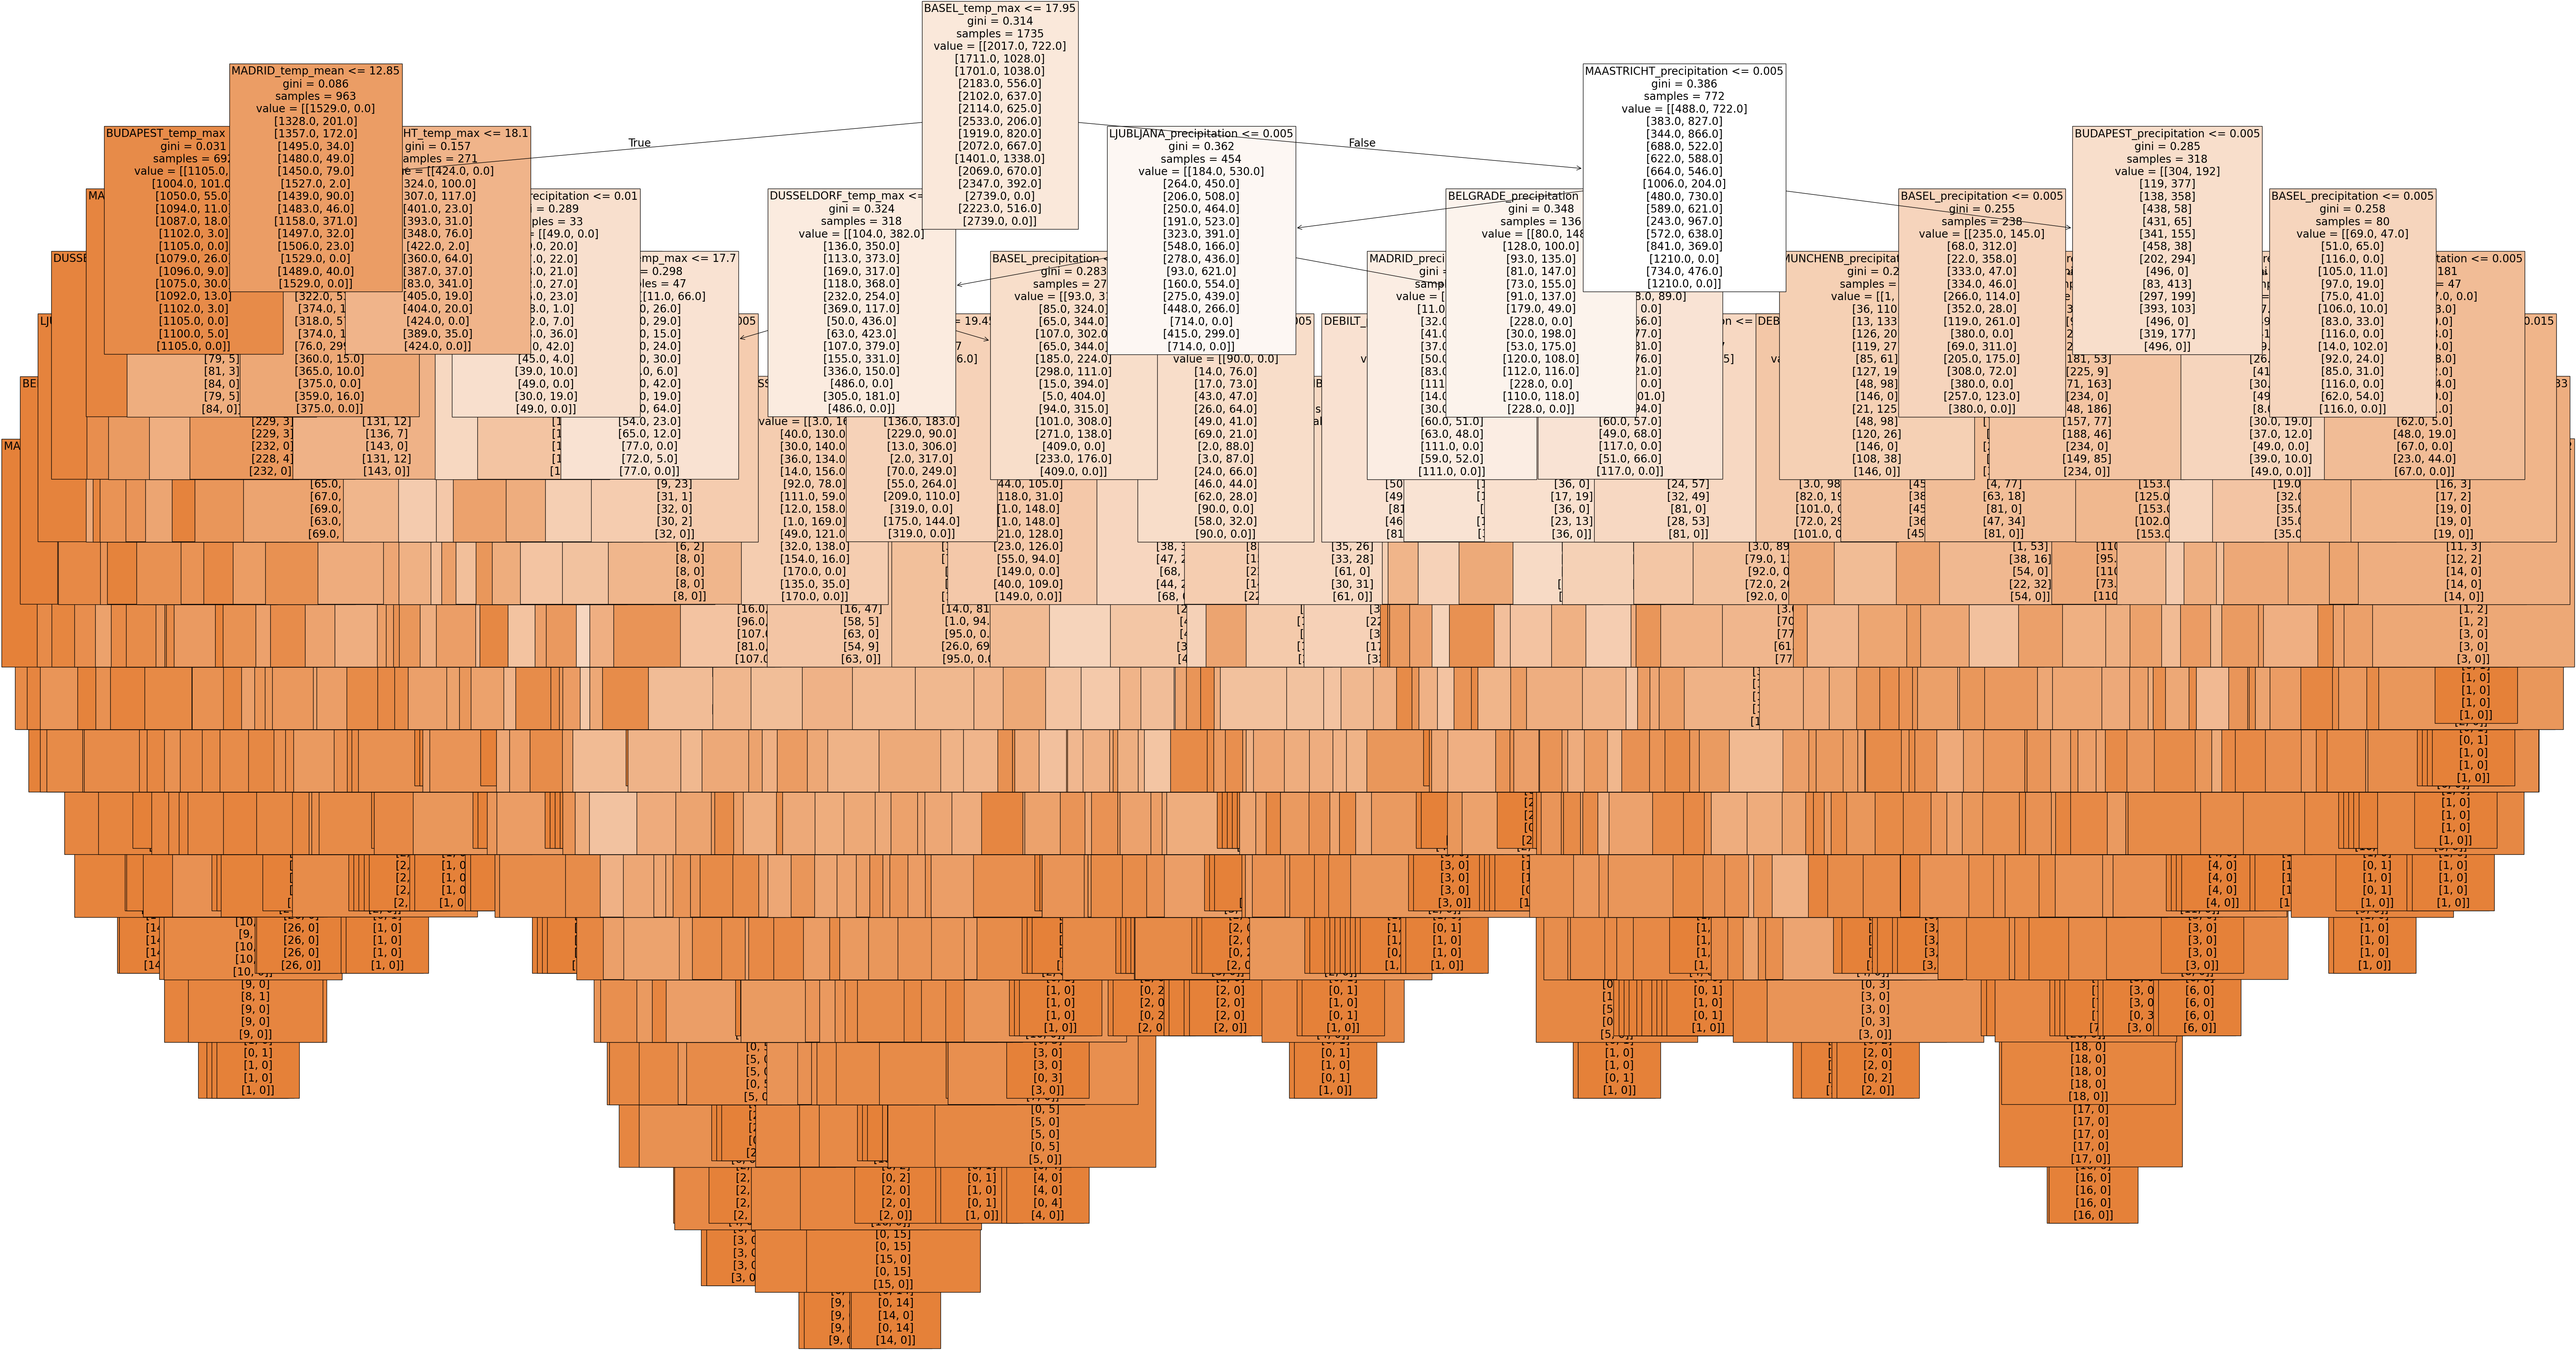

In [35]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[15], fontsize = 20, feature_names = dfdecade.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [37]:
fig.savefig(os.path.join(path,'optimized_random_forest_2010s.png'), bbox_inches='tight')

### 7. Uncovering Feature Importances

In [38]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([1.76094545e-03, 2.48631847e-03, 1.81143737e-03, 2.26533503e-03,
       3.02565786e-02, 4.07110867e-03, 2.49933936e-03, 1.82867574e-03,
       8.08789804e-02, 2.97425020e-03, 2.45051650e-03, 2.37360079e-03,
       2.02297160e-03, 2.80843873e-02, 2.16073182e-03, 3.75822313e-03,
       2.18344599e-03, 7.62455195e-03, 2.75240533e-04, 0.00000000e+00,
       0.00000000e+00, 9.42330550e-04, 2.52531514e-02, 7.93911011e-04,
       9.43953858e-03, 2.30419824e-03, 1.70586081e-02, 1.49448481e-03,
       1.82817489e-03, 2.23629545e-03, 2.68657815e-03, 1.54233877e-02,
       2.71053293e-03, 2.53167953e-03, 2.25204404e-03, 4.08758615e-02,
       1.14936579e-03, 1.97602563e-03, 2.03488996e-03, 2.10518932e-03,
       3.64903202e-02, 2.92511588e-03, 1.03583407e-02, 1.75447346e-03,
       1.07547830e-01, 2.00483765e-03, 3.28339526e-03, 2.35257569e-03,
       3.00308827e-03, 1.33361736e-02, 3.86457628e-03, 2.78212274e-03,
       2.03583337e-03, 1.01812541e-02, 1.24020895e-03, 1.82626812e-03,
      

In [39]:
# Reshape newarray

newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[1.76094545e-03, 2.48631847e-03, 1.81143737e-03, 2.26533503e-03,
         3.02565786e-02, 4.07110867e-03, 2.49933936e-03, 1.82867574e-03,
         8.08789804e-02],
        [2.97425020e-03, 2.45051650e-03, 2.37360079e-03, 2.02297160e-03,
         2.80843873e-02, 2.16073182e-03, 3.75822313e-03, 2.18344599e-03,
         7.62455195e-03],
        [2.75240533e-04, 0.00000000e+00, 0.00000000e+00, 9.42330550e-04,
         2.52531514e-02, 7.93911011e-04, 9.43953858e-03, 2.30419824e-03,
         1.70586081e-02],
        [1.49448481e-03, 1.82817489e-03, 2.23629545e-03, 2.68657815e-03,
         1.54233877e-02, 2.71053293e-03, 2.53167953e-03, 2.25204404e-03,
         4.08758615e-02],
        [1.14936579e-03, 1.97602563e-03, 2.03488996e-03, 2.10518932e-03,
         3.64903202e-02, 2.92511588e-03, 1.03583407e-02, 1.75447346e-03,
         1.07547830e-01],
        [2.00483765e-03, 3.28339526e-03, 2.35257569e-03, 3.00308827e-03,
         1.33361736e-02, 3.86457628e-03, 2.78212274e-03, 2.03583337

In [40]:
# Collapse this shape into one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.12785872, 0.05363268, 0.05606698, 0.07203904, 0.16634155,
       0.04284386, 0.02662103, 0.07386397, 0.1324678 , 0.07346228,
       0.07261485, 0.04386841, 0.01762657, 0.03773947, 0.00295281])

In [41]:
# Extract stations list

stations = [col.split('_')[0] for col in dfdecade.columns if '_' in col]

In [42]:
# Create a set of unique station names

unique_stations = set(stations)
unique_stations

{'BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA'}

In [43]:
# Convert the set of unique stations to a list

unique_stations_list = list(unique_stations)

In [44]:
important = pd.Series(sumarray, index = unique_stations_list)
important = important.sort_values(ascending = False)
important

MADRID        0.166342
STOCKHOLM     0.132468
KASSEL        0.127859
SONNBLICK     0.073864
BELGRADE      0.073462
HEATHROW      0.072615
MUNCHENB      0.072039
MAASTRICHT    0.056067
DEBILT        0.053633
BUDAPEST      0.043868
DUSSELDORF    0.042844
LJUBLJANA     0.037739
OSLO          0.026621
VALENTIA      0.017627
BASEL         0.002953
dtype: float64

In [45]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': unique_stations_list,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

['KASSEL', 'DEBILT', 'MAASTRICHT', 'MUNCHENB', 'MADRID', 'DUSSELDORF', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'BELGRADE', 'HEATHROW', 'BUDAPEST', 'VALENTIA', 'LJUBLJANA', 'BASEL']


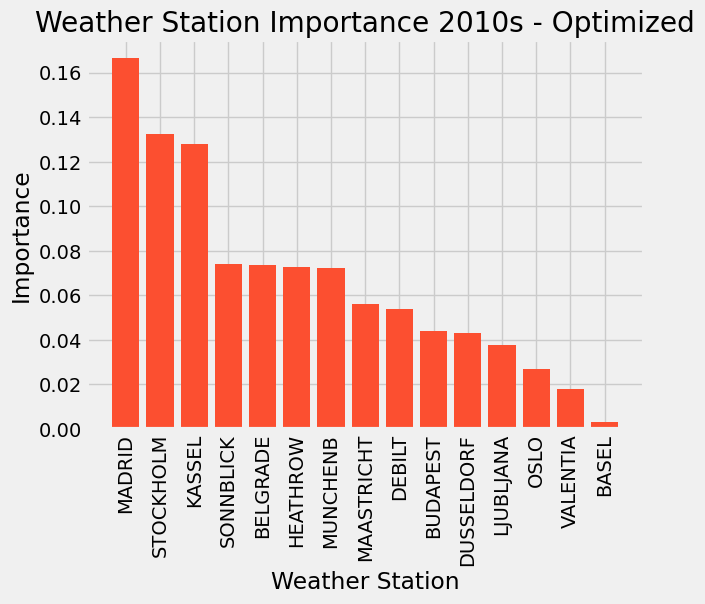

In [47]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
print(unique_stations_list)

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2010s - Optimized')

plt.savefig(os.path.join(path,'optimized_featureimportance_2010s.png'), bbox_inches='tight')

plt.show()

### Random Forest for Madrid Data (all years)

In [48]:
# Filter weather dataset to only include Debilt
df_madrid = df[df.columns[df.columns.astype(str).str.startswith('MADRID')]]


df_madrid

MADRID_cloud_cover  MADRID_humidity  MADRID_pressure  \
0                       6             0.92           1.0260   
1                       7             0.86           1.0254   
2                       5             0.90           1.0287   
3                       0             0.75           1.0281   
4                       2             0.64           1.0269   
...                   ...              ...              ...   
22945                   8             0.52           1.0204   
22946                   8             0.51           1.0221   
22947                   8             0.46           1.0186   
22948                   5             0.66           1.0186   
22949                   8             0.82           1.0188   

       MADRID_global_radiation  MADRID_precipitation  MADRID_sunshine  \
0                         0.53                  0.00              1.4   
1                         0.46                  0.00              0.9   
2                         0.63                  0.00              2.3   
3                         1.16                  0.00              8.7   
4                         1.10                  0.00              7.8   
...                        ...                   ...              ...   
22945                     1.89                  0.12              5.3   
22946                     1.89                  0.12              3.9   
22947                     1.89                  0.12              8.1   
22948                     1.89                  0.12              3.1   
22949                     1.89                  0.12              0.0   

       MADRID_temp_mean  MADRID_temp_min  MADRID_temp_max  
0                   7.6              4.4             10.8  
1                   9.8              7.4             12.2  
2                   8.6              6.4             10.8  
3                  10.3              4.5             16.1  
4                  12.1              8.2             16.0  
...                 ...              ...              ...  
22945              20.0             16.2             23.9  
22946              19.1             14.7             23.5  
22947              19.0             15.4             22.6  
22948              15.7             13.1             18.3  
22949              14.1             12.1             16.1  

[22950 rows x 9 columns]

In [49]:
# Filter pleasant dataset to only include Madrid
pleasant_mad = pleasantweather[pleasantweather.columns[pleasantweather.columns.astype(str).str.startswith('DEBILT')]]

pleasant_mad

DEBILT_pleasant_weather
0                            0
1                            0
2                            0
3                            0
4                            0
...                        ...
22945                        0
22946                        0
22947                        0
22948                        0
22949                        0

[22950 rows x 1 columns]

In [62]:
# Create matrices
y2 = pleasant_mad.max(axis=1)

y2.shape

(22950,)

In [63]:
# Ensure y has the correct shape
y2 = y2.to_numpy().reshape(-1)


y2.shape

(22950,)

In [65]:
# Create X matrix
X2 = df_madrid.to_numpy()

# Check shapes of the matrices
print(X2.shape)
print(y2.shape)

(22950, 9)
(22950,)


In [69]:
# Turn X2 and y2 from df to arrays

X = np.array(X2)
y = np.array(y2)

In [70]:
X.shape

(22950, 9)

In [71]:
y.shape

(22950,)

In [72]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [73]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [74]:
X_train

array([[ 4.    ,  0.48  ,  1.0139, ..., 24.8   , 19.    , 30.5   ],
       [ 5.    ,  0.7   ,  1.0192, ...,  5.8   ,  2.7   ,  8.8   ],
       [ 8.    ,  0.91  ,  1.0006, ...,  2.1   ,  0.6   ,  3.6   ],
       ...,
       [ 6.    ,  0.53  ,  1.0147, ..., 18.1   , 13.2   , 23.    ],
       [ 0.    ,  0.45  ,  1.0204, ..., 17.5   , 10.2   , 24.8   ],
       [ 6.    ,  0.74  ,  1.0155, ..., 13.4   ,  9.2   , 17.5   ]])

In [75]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [76]:
X_test

array([[ 2.    ,  0.42  ,  1.0114, ..., 24.8   , 18.3   , 31.2   ],
       [ 6.    ,  0.78  ,  1.0086, ..., 12.3   ,  7.6   , 17.    ],
       [ 0.    ,  0.38  ,  1.0129, ..., 27.2   , 20.9   , 33.5   ],
       ...,
       [ 8.    ,  0.91  ,  1.0057, ..., 12.5   , 10.6   , 14.4   ],
       [ 0.    ,  0.48  ,  1.0165, ..., 14.4   ,  9.4   , 19.4   ],
       [ 8.    ,  0.64  ,  1.0178, ..., 20.6   , 17.6   , 23.5   ]])

In [77]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

## Hyperparameter Optimization

### Grid Search

In [78]:
# Create a RF classifier

clf = RandomForestClassifier()

In [79]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [80]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 2.1212382475535074 minutes


In [82]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8230306215724991


### Random Search

In [83]:
# Define random search cv
rs_space = {
    'max_depth': list(np.arange(1, 10, step=1)) + [None],  
    'n_estimators': np.arange(100, 300, step=50),  
    'max_features': randint(2, 5),  
    'criterion': ['gini', 'entropy'],  
    'min_samples_leaf': randint(1, 4),  
    'min_samples_split': np.arange(2, 10, step=2)  
}

In [84]:
# Create a RF classifier

clf2= RandomForestClassifier()

[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.805 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.805 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.805 total time=   0.3s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.805 total time=   0.3s
[CV 1/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.805 total time=   0.7s
[CV 2/3] END max_depth=3, max_features=1, min_samples_leaf=3, min_samples_split=3, n_estimators=200;, score=0.805 total time=   0.5s
[CV 1/3] END max_depth=3, max_features=3, min_samples_leaf=2, min_sampl

In [85]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=100, scoring='accuracy', verbose=3, n_jobs=-1, cv=5)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Search took 1.7503558039665221 minutes


In [86]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best RANDOM search score is: 0.8230888599475851


In [87]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best GRID search score is: 0.8230306215724991
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}
Best RANDOM search score is: 0.8230888599475851


### Running Random Forest with Optimized Search Parameters

In [88]:
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 250, max_depth=7, max_features=2, min_samples_leaf=2, min_samples_split=2, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, max_features=2, min_samples_leaf=2,
                       n_estimators=250)

In [89]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  0.8203206692227257


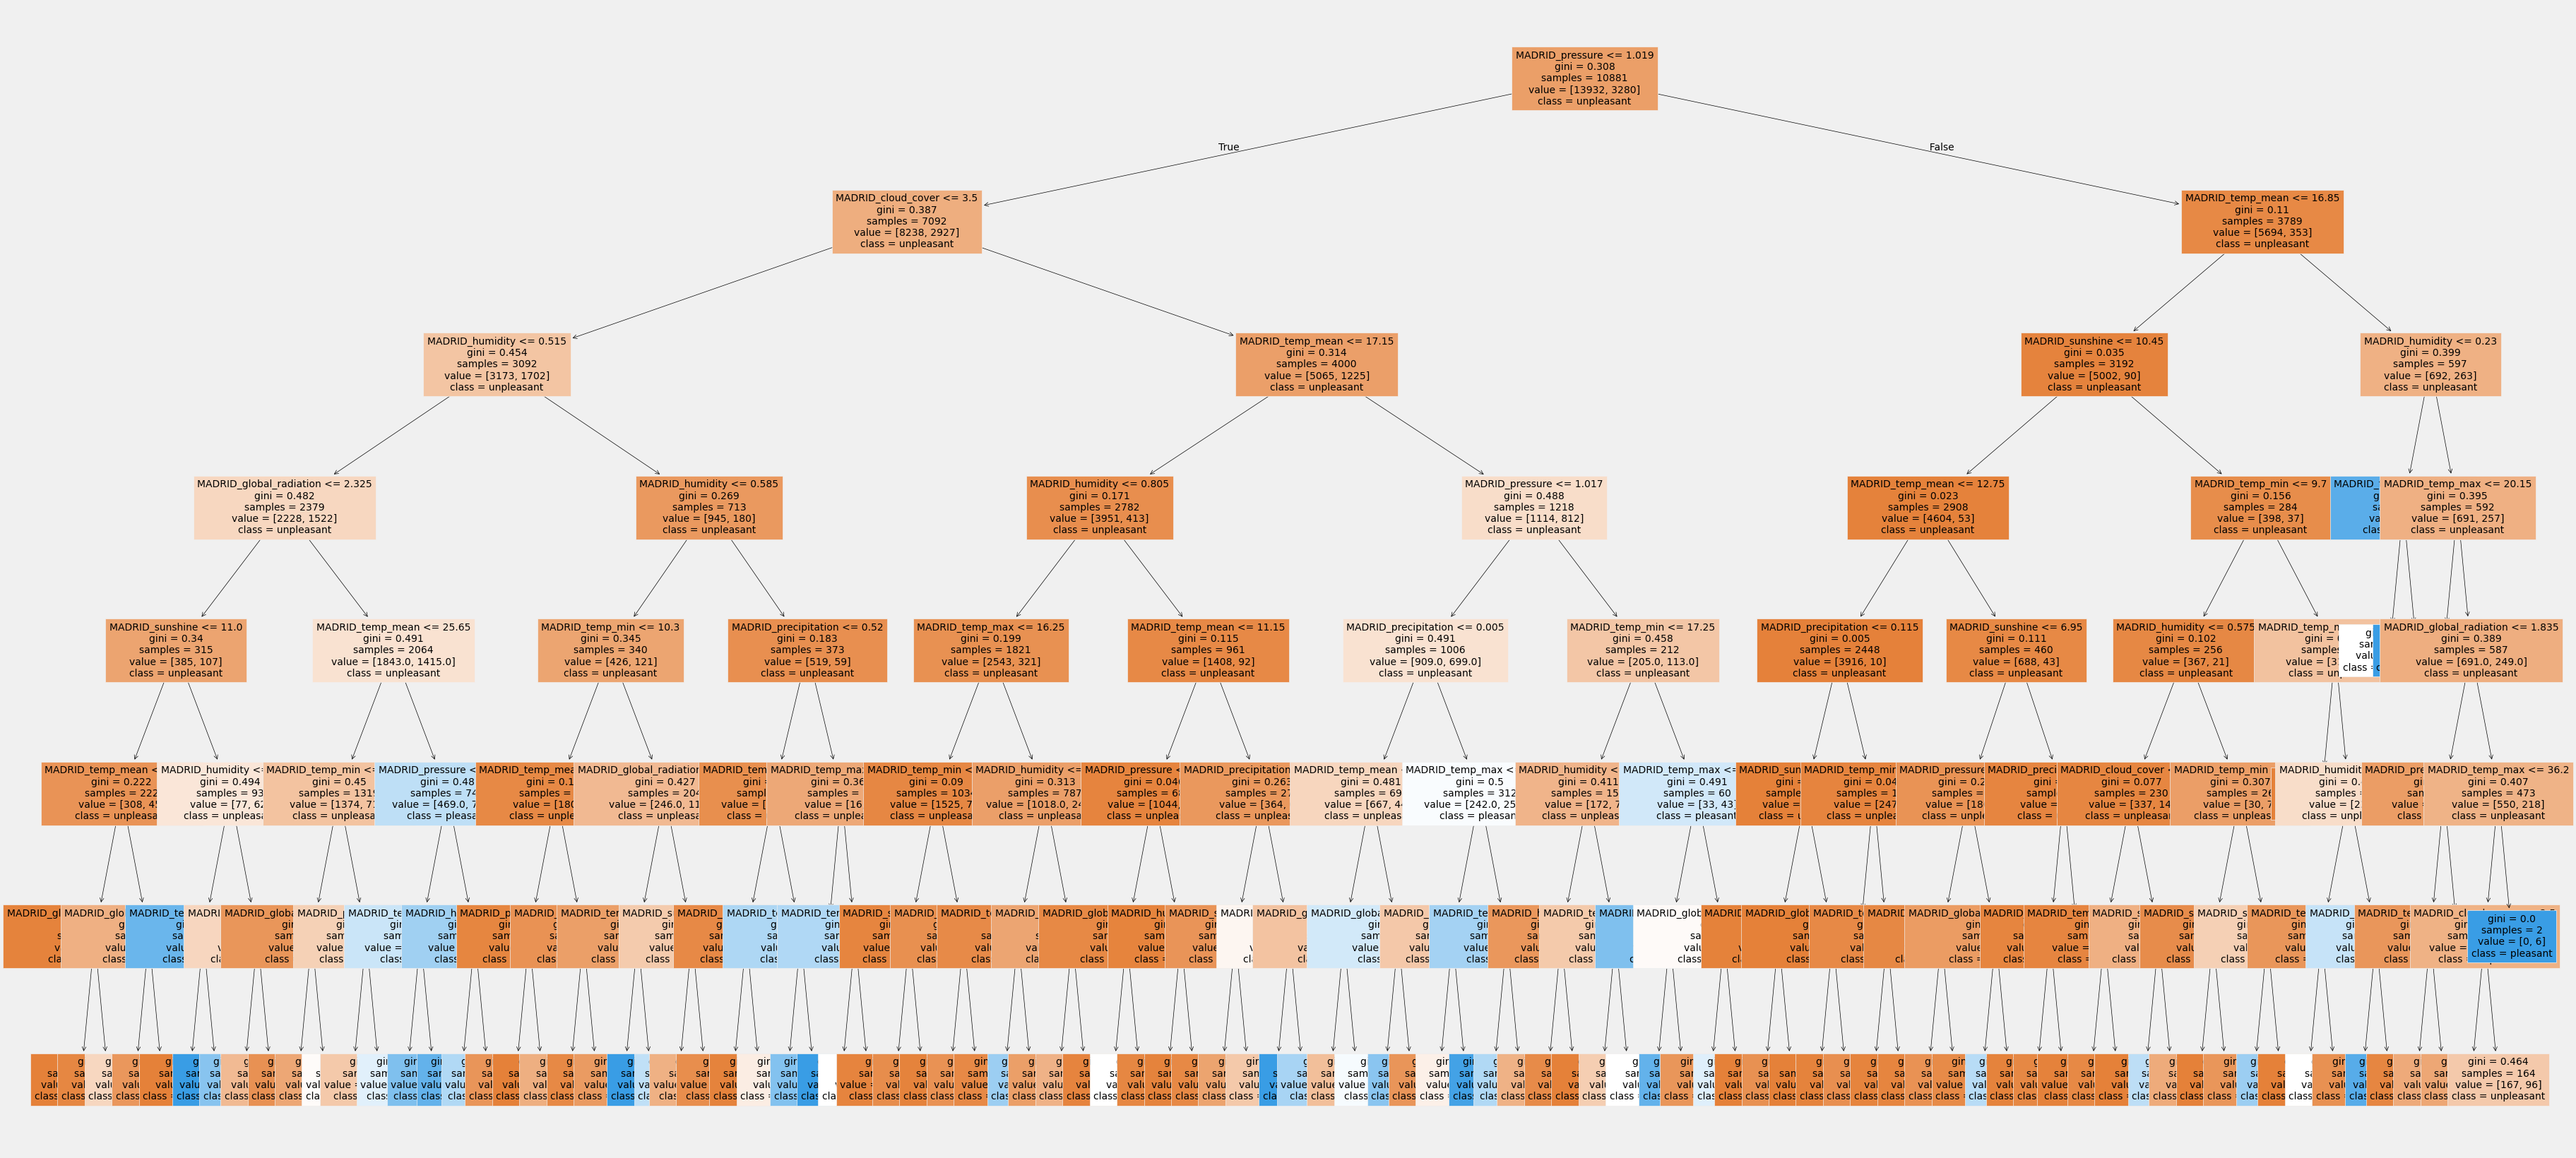

[CV 3/5] END criterion=gini, max_depth=None, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.808 total time=   1.7s
[CV 4/5] END criterion=gini, max_depth=9, max_features=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.824 total time=   3.0s
[CV 2/5] END criterion=gini, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=250;, score=0.813 total time=   2.8s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=4, min_samples_leaf=2, min_samples_split=6, n_estimators=250;, score=0.827 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=2, max_features=3, min_samples_leaf=1, min_samples_split=8, n_estimators=250;, score=0.819 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=4, min_samples_leaf=3, min_samples_split=4, n_estimators=100;, score=0.820 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=6, max_features=3, min_samples_leaf=3, min_samples_spli

In [92]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(40,20))
plot_tree(clf3.estimators_[6], fontsize = 10, feature_names = df_madrid.columns, class_names=['unpleasant', 'pleasant'], filled=True)
plt.show();

In [93]:
fig.savefig(os.path.join(path,'optimized_random_forest_madrid.png'),bbox_inches='tight')

#### Uncovering Feature Importances

In [94]:
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([0.01600263, 0.04187239, 0.05152928, 0.08198779, 0.02171648,
       0.05323275, 0.2473664 , 0.28652759, 0.19976469])

In [95]:
# Retrieve feature importances from the trained model
mad_importance = clf3.feature_importances_
print("Feature Importances:", mad_importance)
print(mad_importance.shape)

Feature Importances: [0.01600263 0.04187239 0.05152928 0.08198779 0.02171648 0.05323275
 0.2473664  0.28652759 0.19976469]
(9,)


In [96]:
# Create list for observation measurements
measurements = [
    'cloud_cover', 'humidity', 'pressure', 'global_radiation', 
    'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [97]:
# Create a dataframe to associate observation measurements with their importances
mad_importance = pd.DataFrame({
    'Measurement': measurements,
    'Importance': mad_importance
})

In [98]:
# Sort by importance for chart readability
mad_importance = mad_importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(mad_importance)

Feature Importance:
        Measurement  Importance
7          temp_min    0.286528
6         temp_mean    0.247366
8          temp_max    0.199765
3  global_radiation    0.081988
5          sunshine    0.053233
2          pressure    0.051529
1          humidity    0.041872
4     precipitation    0.021716
0       cloud_cover    0.016003


<Figure size 1000x600 with 0 Axes>

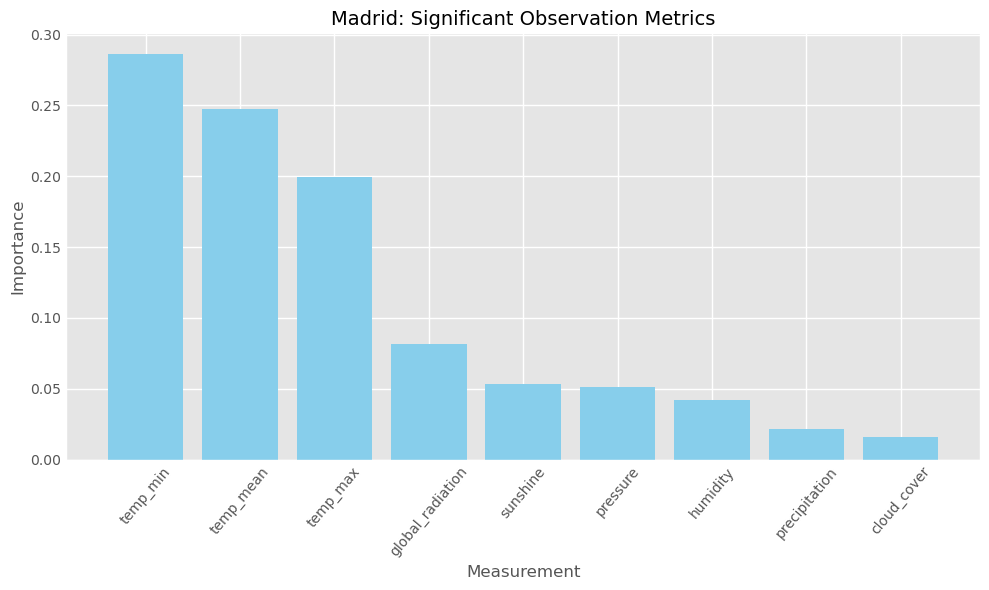

In [100]:
# Plot the importances

plt.style.use('ggplot')
plt_3 = plt.figure(figsize=(10, 6))
plt.bar(mad_importance['Measurement'], mad_importance['Importance'], color='skyblue')
plt.xticks(rotation=50, ha='center')
plt.xlabel('Measurement', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title("Madrid: Significant Observation Metrics", fontsize=14)
plt.tight_layout()
plt.show()